## 1. 데이터 분석 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 데이터의 컬럼 타입 확인하기 -> df.info( )

In [3]:
print("\n ### 학습 데이터 정보 ###  \n")
print(titanic_df.info())


 ### 학습 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


## 3. Null 값 처리

In [9]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)  # Age의 결측치는 평균값으로 채워서 저장
titanic_df['Cabin'].fillna('N', inplace=True)  # Cabin 결측치는 'N'으로 채워서 저장
titanic_df['Embarked'].fillna('N', inplace=True)  # Embarked 결측치는 'N'으로 채워서 저장

print("데이터 세트 Null 값 개수 \n", titanic_df.isnull().sum())

데이터 세트 Null 값 개수 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## 4. 남아있는 문자열 피처에 대한 값 분류를 살펴보기 -> value_counts( ) 메서드 사용

In [14]:
print(" Sex 값 분포 :\n", titanic_df['Sex'].value_counts())
print("\n Cabin 값 분포 :\n", titanic_df['Cabin'].value_counts())
print("\n Embarked 값 분포 :\n", titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
C49              1
A10              1
C87              1
C128             1
C111             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


## 5. Cabin 속성에 대해서 앞 클래스 이름만 추출하기

In [15]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[0]
print(titanic_df['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


## 6. 성별에 따른 생존자 수를 비교

In [16]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

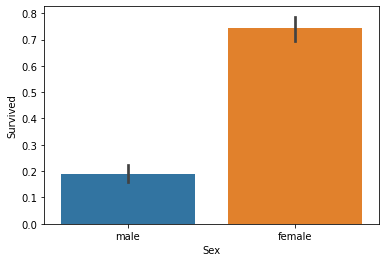

In [17]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

## 7. 객실 등급(부의 수준)과 성별을 함께 고려한 생존자 수 비교

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

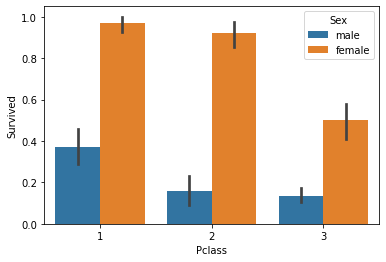

In [18]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

## 8. 연령 별 생존 확률 비교

In [21]:
# 입력 Age에 따라 카테고리 값을 할당하는 함수 -> DataFrame의 apply lambda 식에 사용
def get_category(age):
    cat = ''
    if age <= 1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Eldery'
        
    return cat

In [22]:
# 막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Eldery']

<Figure size 720x432 with 0 Axes>

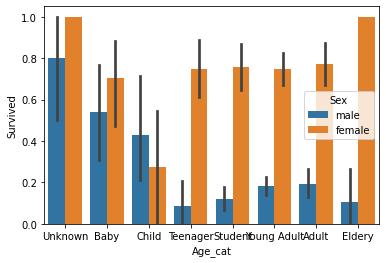

In [23]:
# lambda 식에 위해서 생성한 get_category() 함수를 반환값으로 지정
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

### 결론) 6-8을 통해 Sex, Age, PClass가 생존을 좌우하는 중요한 피처임을 알 수 있었음!

## 9. 남아있는 문자열 카테고리 -> 숫자형 카테고리 피처로 전환

In [24]:
from sklearn.preprocessing import LabelEncoder

In [27]:
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

In [28]:
titanic_df = encode_features(titanic_df)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


## 10. 데이터 가공 -> 함수로 만들어 재사용할 수 있도록 만들기

In [29]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)  
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거 함수
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

## 머신러닝 예제

In [30]:
# 원본 데이터 재로딩
titanic_df = pd.read_csv('titanic_train.csv')

In [31]:
# 피처 데이터 세트, 레이블 데이터 세트 추출
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

In [32]:
# 피처 데이터 세트 전처리
X_titanic_df = transform_features(X_titanic_df)

In [36]:
# 20%의 테스트 데이터 세트 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=11)

In [40]:
# ML 알고리즘을 이용해 타이타닉 생존자 예측하기

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassifier 정확도: {0:.4f}".format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도: {0:.4f}".format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도: {0:.4f}".format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# 교차 검증 (1) -> 사이킷런의 KFold 클래스 이용

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df에서 교차 검증별로 학습과 테스트 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
        
    # 5개 fold에서 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
    
exec_kfold(dt_clf)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [43]:
# 교차 검증 (2) -> cross_val_score()

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [ ]:
# 교차 검증 (3) -> GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
             'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터:", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도: {0:.4f}:".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# 최적 하이퍼 파라미터로 학습된 Estimator로 학습된 Estimator로 예측 및 평가 수행
dpredictons = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictons)
print("테스트 세트에서의 ")